# TTV Retrieval for Kepler-51

In this notebook, we will perform a dynamical retrieval for Kepler-51 = KOI-620. This is a system with three "super-puffs," planets with anomalously small densities, first analyzed by Masuda (2014). Hopefully, a three-planet system won't be too complex for us to handle. First, let's import packages and import data from the latest analysis of this system by Libby-Roberts et al. (2020):

In [1]:
%matplotlib inline
import ttvnest
import numpy as np

data = []
errs = []
epochs = []

#reading in from Libby-Roberts+20
fnames = ['k51b.txt', 'k51c.txt', 'k51d.txt']
def read_data(fname):
    dat = np.loadtxt(fname, skiprows = 5)
    tempdat = np.array(dat[:,1], dtype = 'float')
    tempep = np.array(dat[:,0], dtype = 'int')
    temperr = np.maximum(np.array(dat[:,2], dtype = 'float'), np.array(dat[:,3], dtype = 'float'))
    return tempdat, temperr, tempep

for fname in fnames:
    a, b, c = read_data(fname)
    data.append(a)
    errs.append(b)
    epochs.append(c)
    
epochs[1] += 1 #first transit of K51c was not observed

Let's set the timescales for this system:

In [7]:
alltimes = np.concatenate(data).ravel()
mintime = np.floor(min(alltimes)) - 1
data -= mintime
reftime = 2454833 + mintime
sim_length = np.ceil(max(alltimes)) - np.floor(min(alltimes))

Let's plot the data in a dummy system object:

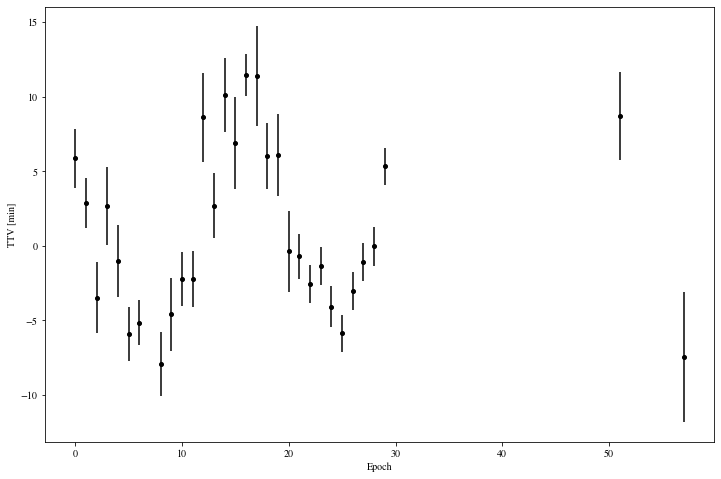

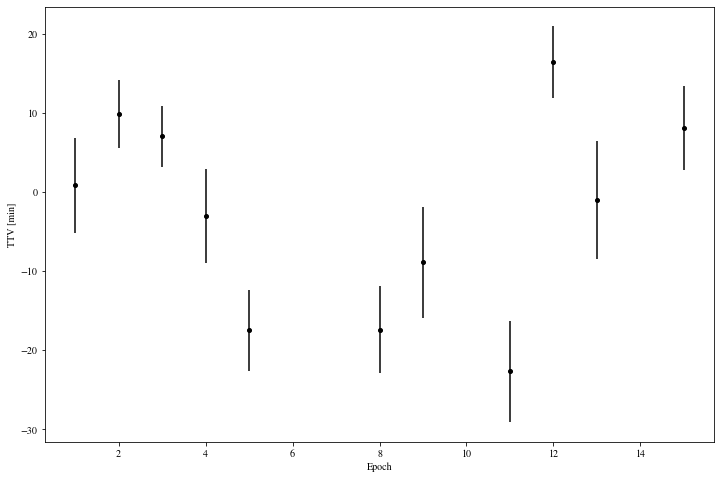

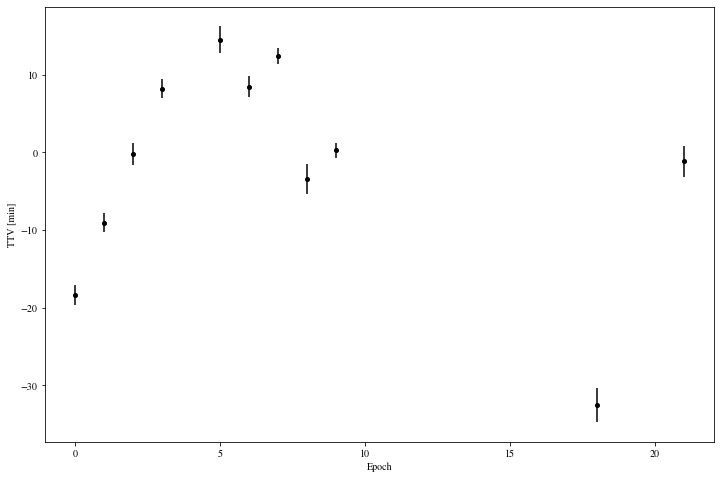

In [8]:
system = ttvnest.TTVSystem()
system.data = data
system.errs = errs
system.epochs = epochs
ttvnest.plot_utils.plot_ttv_data(system)

Clear, anticorrelated signals! Now let's try to model it with ttvnest.

In [12]:
kepler51_b = ttvnest.TTVPlanet(data[0], errs[0], epochs[0], 
                               mass_prior = ('Uniform', 0, 100),
                               period_prior = ('Uniform', 45.155503 - 20*0.000072, 45.155503 + 20*0.000072),
                               t0_prior = ('Uniform', (data[0][0] - epochs[0][0]*45.155503) - 100*errs[0][0],
                                          (data[0][0] - epochs[0][0]*45.155503) + 100*errs[0][0])
                              )

kepler51_c = ttvnest.TTVPlanet(data[1], errs[1], epochs[1], 
                               mass_prior = ('Uniform', 0, 100), 
                               period_prior = ('Uniform', 85.31287 - 20*0.00096, 85.31287 + 20*0.00096),
                               t0_prior = ('Uniform', (data[1][0] - epochs[1][0]*85.31287) - 100*errs[1][0],
                                          (data[1][0] - epochs[1][0]*85.31287) + 100*errs[1][0])
                              )

kepler51_d = ttvnest.TTVPlanet(data[2], errs[2], epochs[2], 
                               mass_prior = ('Uniform', 0, 100), 
                               period_prior = ('Uniform', 130.1831 - 20*0.00033, 130.1831 + 20*0.00033),
                               t0_prior = ('Uniform', (data[2][0] - epochs[2][0]*130.1831) - 100*errs[2][0],
                               (data[2][0] - epochs[2][0]*130.1831) + 100*errs[2][0])
                              )

kepler51 = ttvnest.TTVSystem(kepler51_b, kepler51_c, kepler51_d, 
                             start_time = reftime, dt = 1.5, sim_length = sim_length+10)
print(kepler51.all_priors)

[(0, 'Uniform', 0, 100), (0, 'Uniform', 45.154063, 45.156943000000005), (0, 'Uniform', -1.0, 1.0), (0, 'Uniform', -1.0, 1.0), (0, 'Fixed', 90.0), (0, 'Fixed', 0.0), (0, 'Uniform', 0.9721999999999918, 1.2481999999999918), (1, 'Uniform', 0, 100), (1, 'Uniform', 85.29367, 85.33207), (1, 'Uniform', -1.0, 1.0), (1, 'Uniform', -1.0, 1.0), (1, 'Fixed', 90.0), (1, 'Fixed', 0.0), (1, 'Uniform', 51.583479999999994, 52.42348), (2, 'Uniform', 0, 100), (2, 'Uniform', 130.1765, 130.1897), (2, 'Uniform', -1.0, 1.0), (2, 'Uniform', -1.0, 1.0), (2, 'Fixed', 90.0), (2, 'Fixed', 0.0), (2, 'Uniform', 53.93719, 54.11119000000001)]


In [13]:
results = kepler51.retrieve()

11853it [04:02, 15.04it/s, batch: 0 | bound: 18 | nc: 25 | ncall: 160374 | eff(%):  7.345 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-    nan | dlogz:    inf >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
11957it [04:18, 15.76it/s, batch: 0 | bound: 20 | nc: 25 | ncall: 166389 | eff(%):  7.143 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-    nan | dlogz:    inf >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
12247it [04:43, 15.66it/s, batch: 0 | bound: 23 | nc: 25 | ncall: 176273 | eff(%):  6.909 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-    nan | dlogz:    inf >  0.010]  /us

31318it [31:01, 15.76it/s, batch: 0 | bound: 184 | nc: 25 | ncall: 785843 | eff(%):  3.980 | loglstar:   -inf < -1533.202 <    inf | logz: -1570.222 +/-    nan | dlogz: 1375.290 >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
31594it [31:22, 15.53it/s, batch: 0 | bound: 186 | nc: 25 | ncall: 794236 | eff(%):  3.973 | loglstar:   -inf < -1402.403 <    inf | logz: -1440.390 +/-    nan | dlogz: 1245.492 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor

49284it [53:46, 15.99it/s, batch: 0 | bound: 328 | nc: 25 | ncall: 1319309 | eff(%):  3.733 | loglstar:   -inf < 187.914 <    inf | logz: 136.361 +/-    nan | dlogz: 59.195 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
49732it [54:31, 15.95it/s, batch: 0 | bound: 332 | nc: 25 | ncall: 1336723 | eff(%):  3.718 | loglstar:   -inf < 192.658 <    inf | logz: 140.728 +/-    nan | dlogz: 54.379 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor acco

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
58685it [1:09:12, 15.75it/s, batch: 0 | bound: 407 | nc: 25 | ncall: 1687947 | eff(%):  3.475 | loglstar:   -inf < 246.283 <    inf | logz: 186.823 +/-    nan | dlogz: 14.385 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
60139it [1:11:16, 15.88it/s, batch: 0 | bound: 418 | nc: 25 | ncall: 1737054 | eff(%):  3.460 | loglstar:   -in

65561it [1:25:15, 15.93it/s, batch: 0 | bound: 468 | nc: 25 | ncall: 2074686 | eff(%):  3.159 | loglstar:   -inf < 259.796 <    inf | logz: 195.140 +/-    nan | dlogz:  3.414 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
66123it [1:26:28, 15.81it/s, batch: 0 | bound: 473 | nc: 25 | ncall: 2103861 | eff(%):  3.141 | loglstar:   -inf < 260.357 <    inf | logz: 195.354 +/-    nan | dlogz:  3.169 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-f

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
71024it [1:43:55, 15.91it/s, batch: 0 | bound: 522 | nc: 25 | ncall: 2526851 | eff(%):  2.810 | loglstar:   -inf < 263.822 <    inf | logz: 196.083 +/-    nan | dlogz:  0.379 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
71276it [1:45:04, 15.87it/s, batch: 0 | bound: 525 | nc: 25 | ncall: 2554617 | eff(%):  2.789 | loglstar:   -inf < 263

74779it [1:59:43, 15.95it/s, batch: 0 | bound: 564 | nc: 25 | ncall: 2910436 | eff(%):  2.568 | loglstar:   -inf < 265.451 <    inf | logz: 196.144 +/-    nan | dlogz:  0.047 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
75204it [2:00:57, 15.05it/s, batch: 0 | bound: 568 | nc: 25 | ncall: 2940129 | eff(%):  2.557 | loglstar:   -inf < 265.609 <    inf | logz: 196.146 +/-    nan | dlogz:  0.031 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-f

Let's see if we reproduce the results from Libby-Roberts et al. (2020):

Summary (middle 95 percentile): 
$M_1/M_\star/3\times10^{-6})$: $1.34456^{+1.129114}_{-1.134295}$
$P_1\ [\mathrm{days}]$: $45.154777^{+0.000191}_{-0.000193}$
$e_1\cos(\omega_1)$: $-0.022143^{+0.04092}_{-0.037755}$
$e_1\sin(\omega_1)$: $-0.185222^{+0.04495}_{-0.046343}$
$T_{0,1}\ [\mathrm{days}]$: $1.110572^{+0.000965}_{-0.000926}$
$M_2/M_\star/3\times10^{-6})$: $3.786171^{+0.589315}_{-0.653075}$
$P_2\ [\mathrm{days}]$: $85.311991^{+0.002137}_{-0.002212}$
$e_2\cos(\omega_2)$: $0.055057^{+0.037628}_{-0.031557}$
$e_2\sin(\omega_2)$: $-0.030521^{+0.046663}_{-0.050711}$
$T_{0,2}\ [\mathrm{days}]$: $52.010165^{+0.004659}_{-0.005476}$
$M_3/M_\star/3\times10^{-6})$: $5.568378^{+1.626798}_{-1.571118}$
$P_3\ [\mathrm{days}]$: $130.187843^{+0.001021}_{-0.001275}$
$e_3\cos(\omega_3)$: $-0.019667^{+0.06951}_{-0.034065}$
$e_3\sin(\omega_3)$: $-0.040012^{+0.03554}_{-0.044256}$
$T_{0,3}\ [\mathrm{days}]$: $54.025217^{+0.00112}_{-0.001285}$


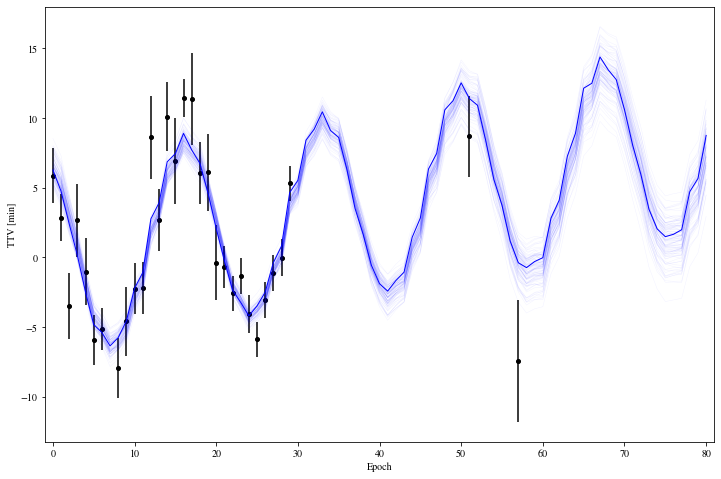

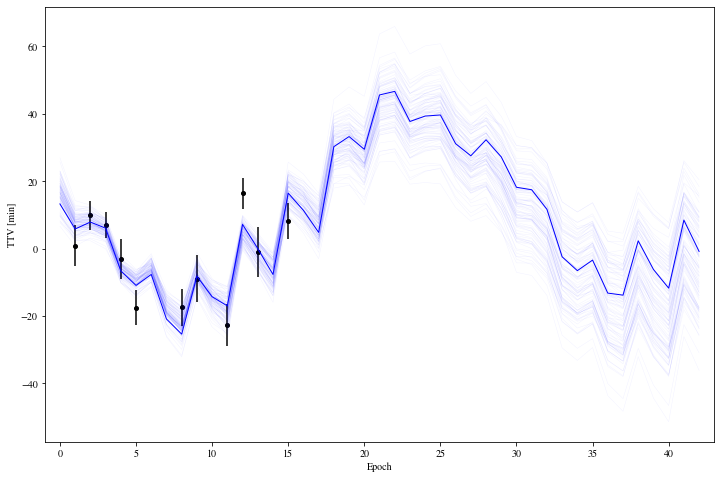

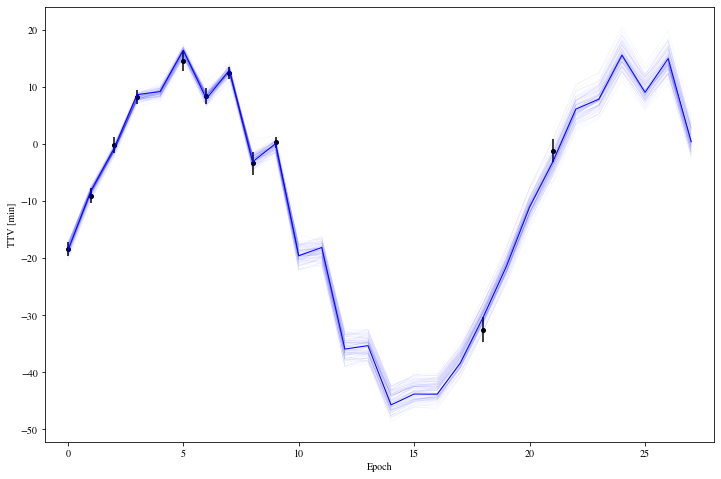

In [14]:
kepler51.posterior_summary()
ttvnest.plot_utils.plot_results(kepler51, uncertainty_curves = 100, sim_length = 365.25*10)

<Figure size 1440x1440 with 0 Axes>

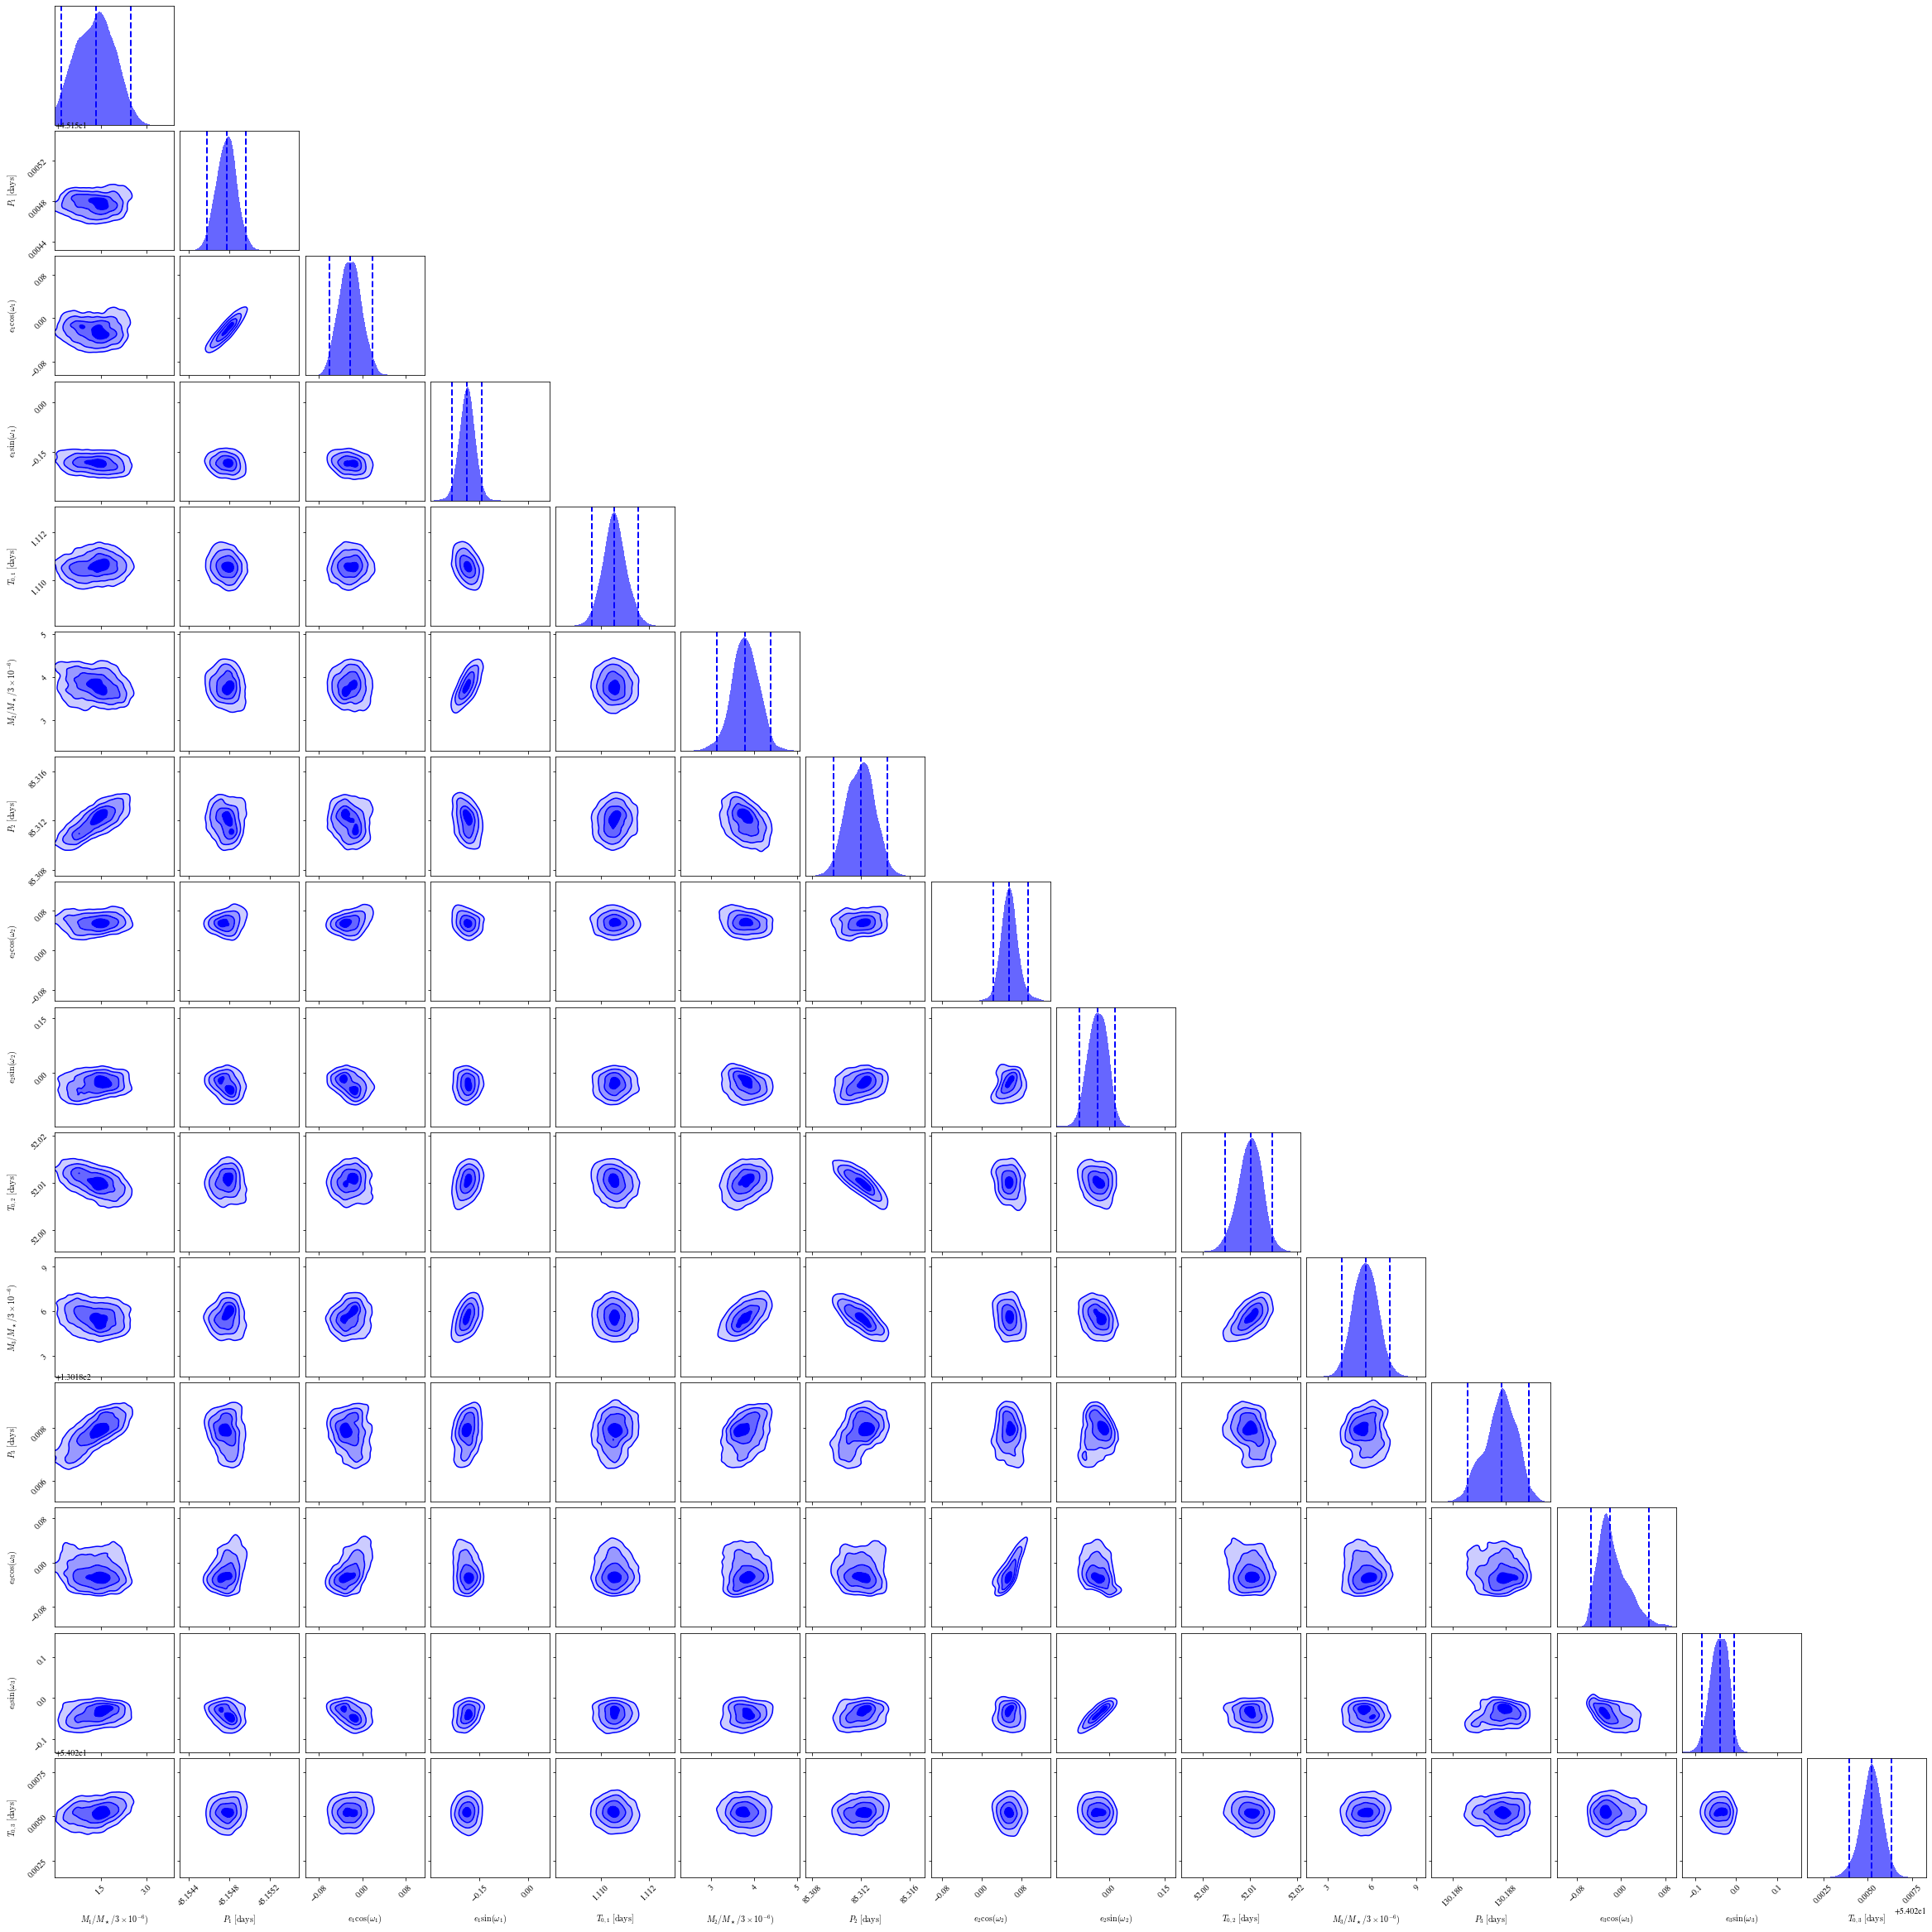

<Figure size 1440x1440 with 0 Axes>

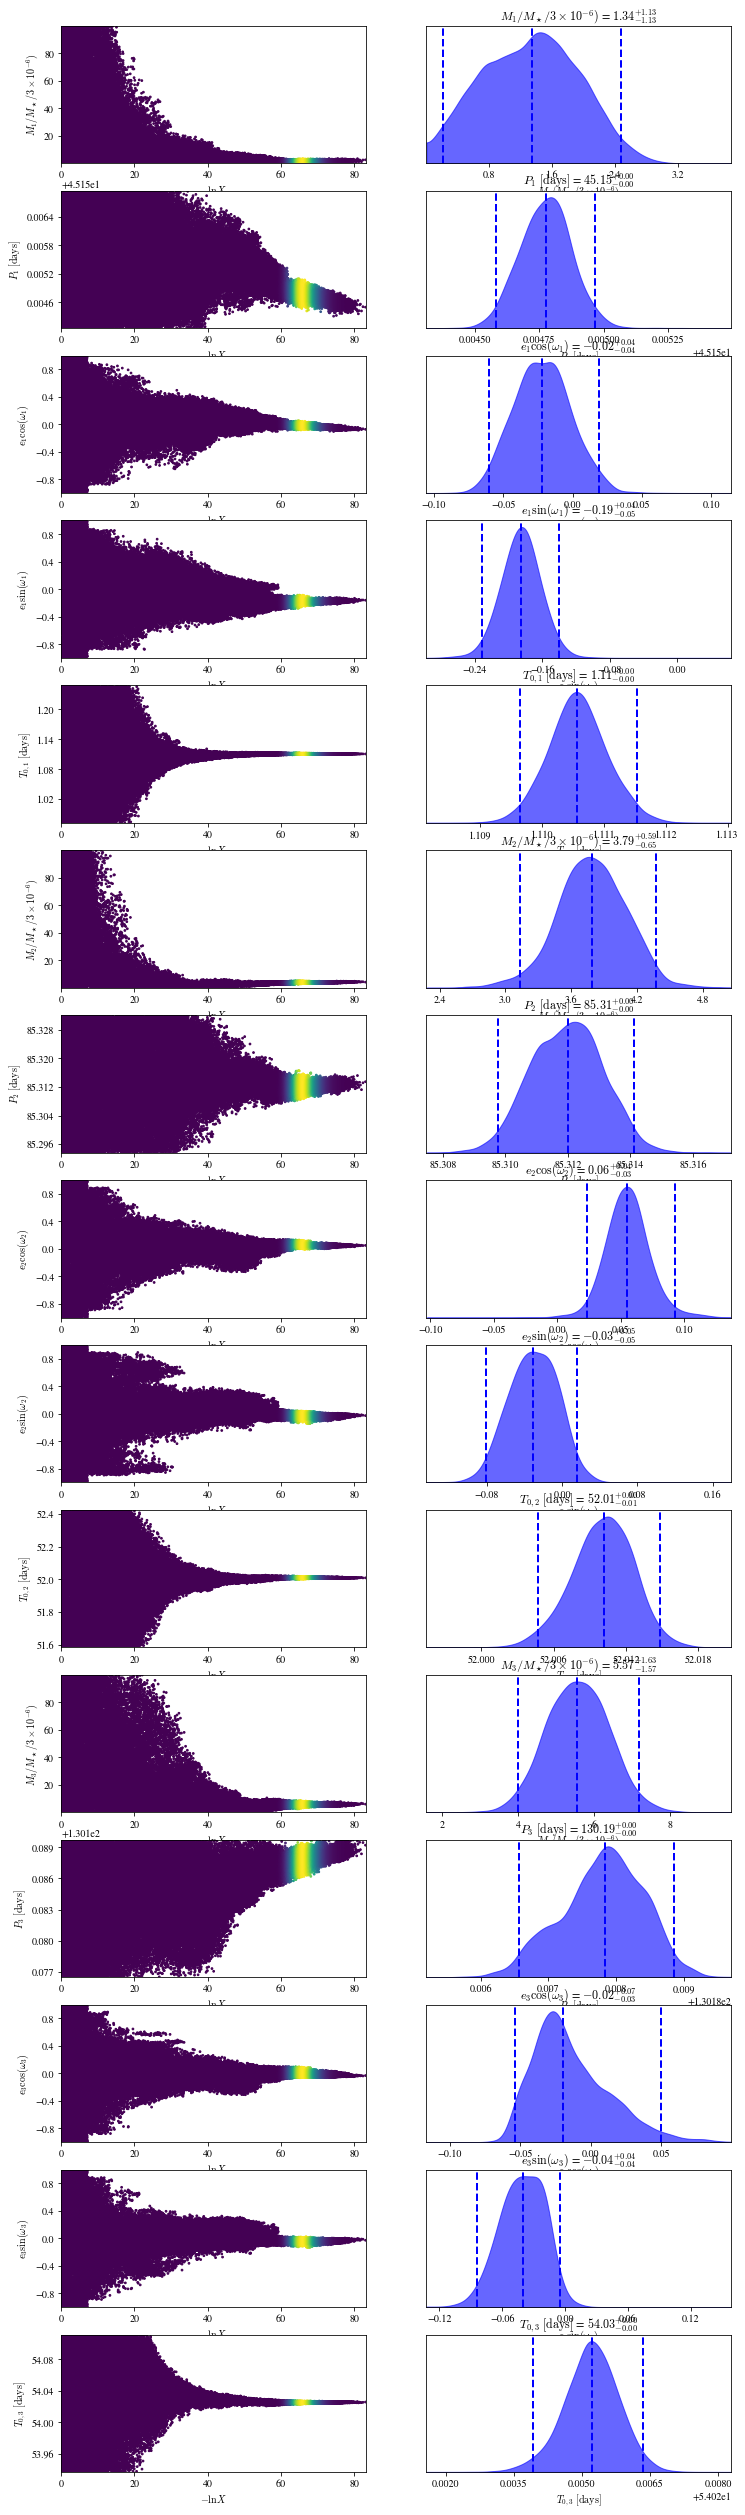

In [15]:
ttvnest.plot_utils.dynesty_plots(kepler51)